<a href="https://colab.research.google.com/github/hoonzi-s/APC/blob/main/%231%20ALK%20-%20213BTMRVP%20Inferential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('alk rvp csv.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2630 non-null   object 
 1   RVP_LAB         2630 non-null   float64
 2   S.B5.213TI2804  2630 non-null   float64
 3   S.B5.213PI2806  2630 non-null   float64
dtypes: float64(3), object(1)
memory usage: 82.3+ KB


In [41]:
data.describe()

,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806
count,2630.000000,2630.000000,2630.000000
mean,39.231825,134.193726,336.796675
std,3.370950,3.357263,31.055837
min,28.500000,102.972618,291.208740
25%,37.400000,132.094322,318.766502
50%,38.900000,133.572754,326.205521
75%,40.600000,136.359463,341.113235
max,98.600000,146.800903,538.144775


In [42]:
data

,Unnamed: 0,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806
0,2014-09-16,35.5,137.519684,340.428040
1,2014-09-17,33.5,139.132400,335.491638
2,2014-09-18,34.4,138.063370,338.226624
3,2014-09-19,34.3,137.549744,336.150085
4,2014-09-20,35.2,137.955627,345.220123
...,...,...,...,...
2625,2022-02-24,44.4,130.993057,334.090607
2626,2022-02-25,39.5,128.206116,324.116180
2627,2022-02-26,42.2,130.070770,318.496826
2628,2022-02-27,44.5,128.796509,326.915588


In [45]:
data.columns = ['DATE', 'RVP_LAB', 'TI2804', 'PI2806']
data

,DATE,RVP_LAB,TI2804,PI2806
0,2014-09-16,35.5,137.519684,340.428040
1,2014-09-17,33.5,139.132400,335.491638
2,2014-09-18,34.4,138.063370,338.226624
3,2014-09-19,34.3,137.549744,336.150085
4,2014-09-20,35.2,137.955627,345.220123
...,...,...,...,...
2625,2022-02-24,44.4,130.993057,334.090607
2626,2022-02-25,39.5,128.206116,324.116180
2627,2022-02-26,42.2,130.070770,318.496826
2628,2022-02-27,44.5,128.796509,326.915588


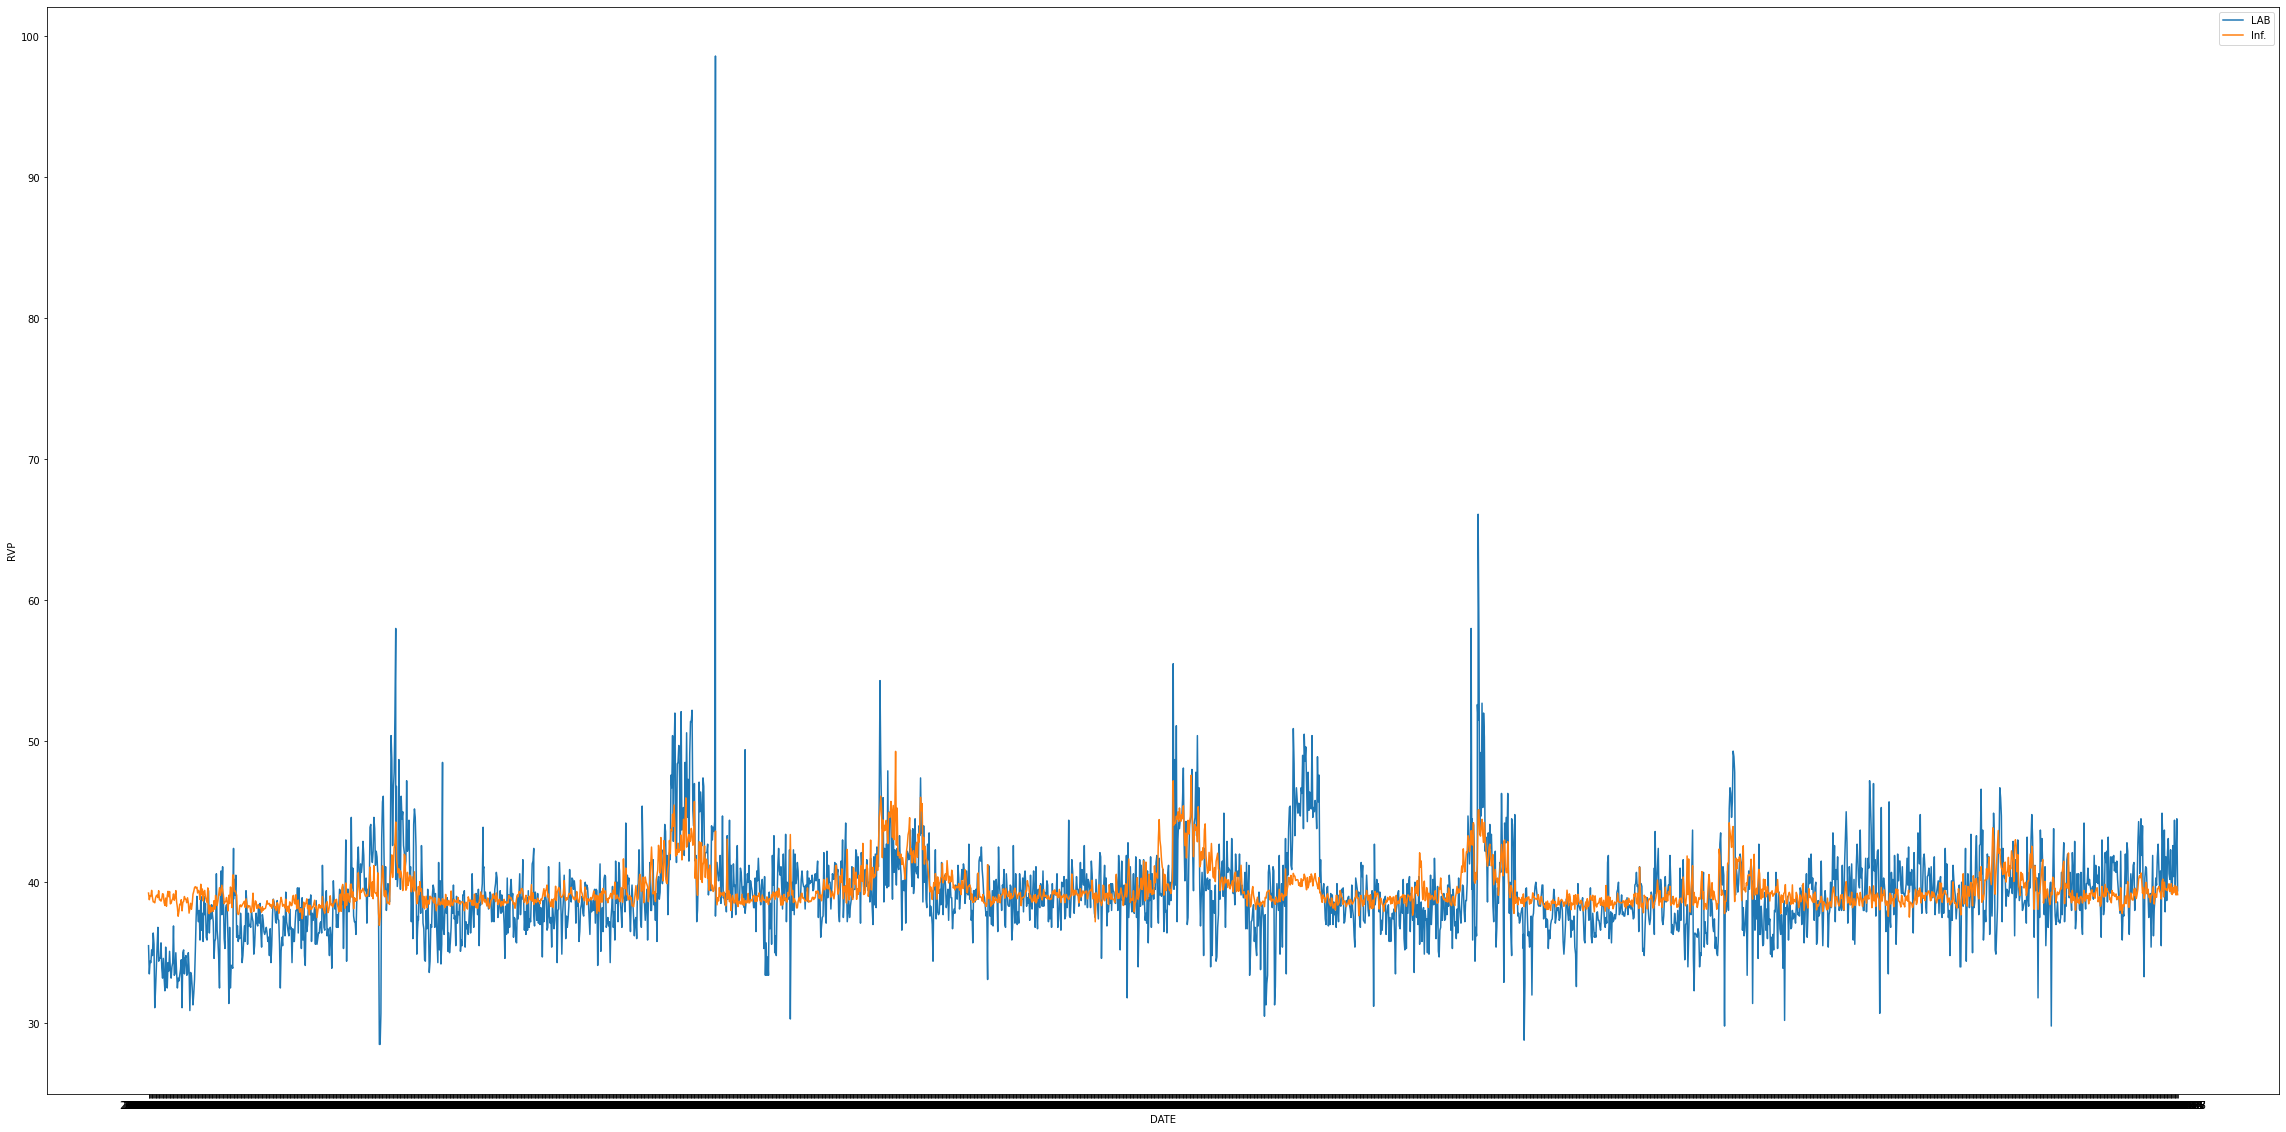

In [63]:
plt.figure(figsize = (40, 20))
plt.plot(data['DATE'], data['RVP_LAB'], label = 'LAB')
plt.plot(data['DATE'], -0.1343 * data['TI2804'] + 0.0520 * data['PI2806'] + 40, label = 'Inf.')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [83]:
input = data[['DATE', 'TI2804', 'PI2806']]
input

,DATE,TI2804,PI2806
0,2014-09-16,137.519684,340.428040
1,2014-09-17,139.132400,335.491638
2,2014-09-18,138.063370,338.226624
3,2014-09-19,137.549744,336.150085
4,2014-09-20,137.955627,345.220123
...,...,...,...
2625,2022-02-24,130.993057,334.090607
2626,2022-02-25,128.206116,324.116180
2627,2022-02-26,130.070770,318.496826
2628,2022-02-27,128.796509,326.915588


In [85]:
target = data[['DATE', 'RVP_LAB']]
target

,DATE,RVP_LAB
0,2014-09-16,35.5
1,2014-09-17,33.5
2,2014-09-18,34.4
3,2014-09-19,34.3
4,2014-09-20,35.2
...,...,...
2625,2022-02-24,44.4
2626,2022-02-25,39.5
2627,2022-02-26,42.2
2628,2022-02-27,44.5


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [92]:
train_input_with_date, test_input_with_date, train_target_with_date, test_target_with_date = tts(input, target, test_size = 0.2)
train_input = train_input_with_date[['TI2804', 'PI2806']]
test_input = test_input_with_date[['TI2804', 'PI2806']]
train_target = train_target_with_date['RVP_LAB']
test_target = test_target_with_date['RVP_LAB']
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.40871544506613966
0.49875124538676263


In [93]:
print(lr.coef_)
print(lr.intercept_)

[-0.59059014  0.07806424]
92.16669183697064


In [94]:
a1 = lr.coef_[0]
a2 = lr.coef_[1]
b = lr.intercept_
result = a1 * train_input['TI2804'] + a2 * train_input['PI2806'] + b
result

1692    37.722435
852     39.213058
386     38.663323
1455    38.290954
1090    44.025218
          ...    
1466    37.470013
2429    38.343419
1871    37.528672
1769    39.195173
737     40.737723
Length: 2104, dtype: float64

ValueError: ignored

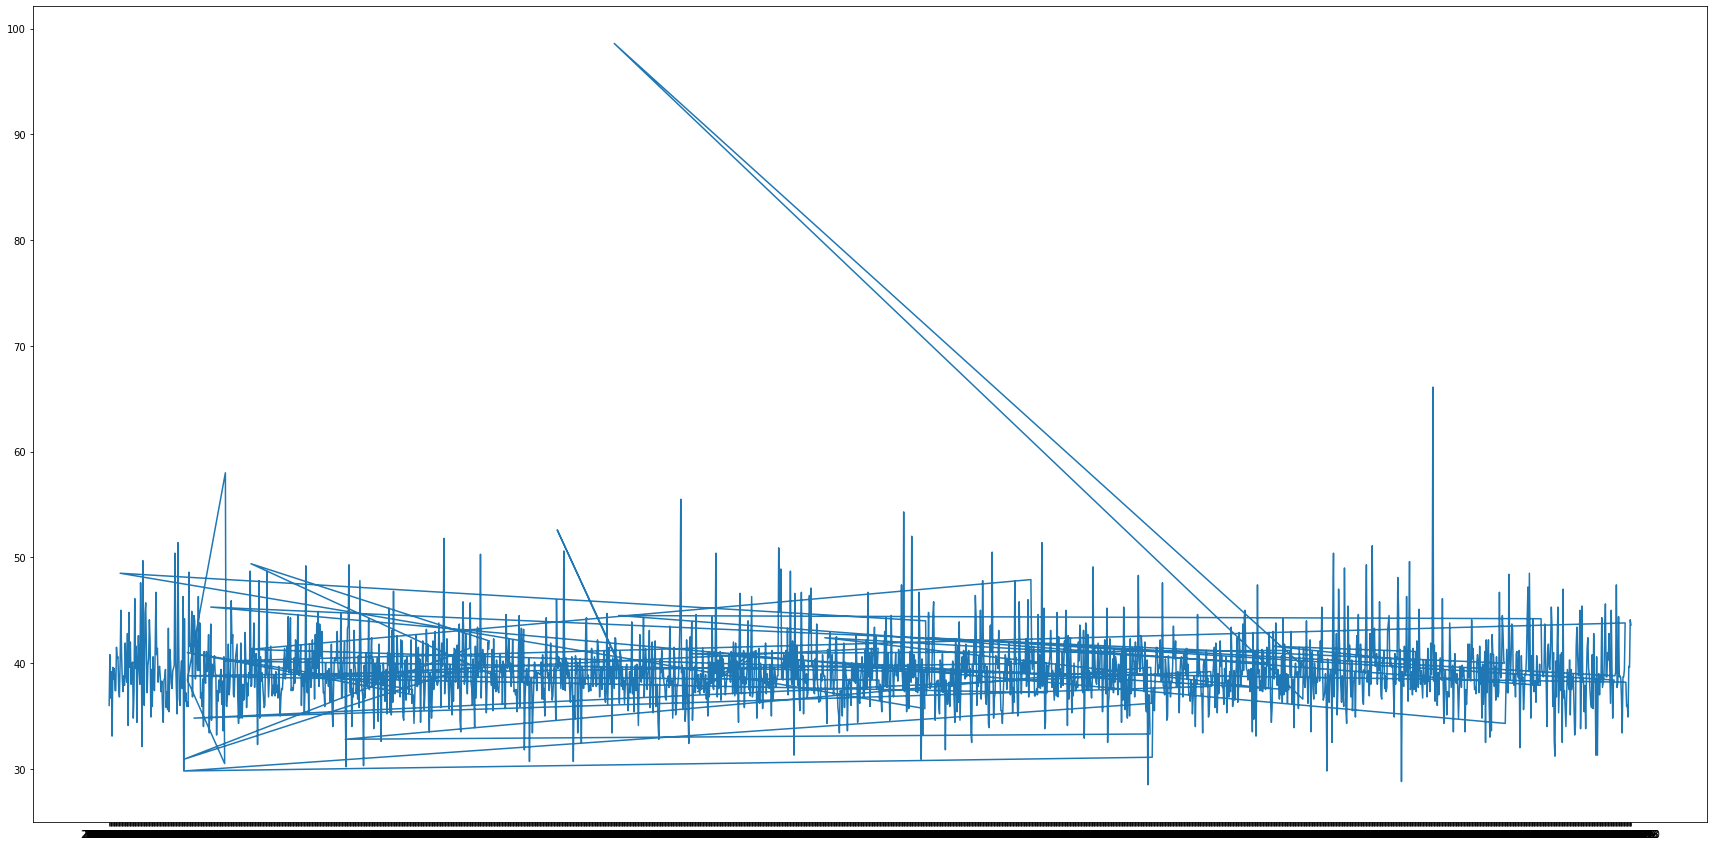

In [99]:
plt.figure(figsize = (30, 15))
plt.scatter(train_input_with_date['DATE'], train_target_with_date['RVP_LAB'], label = 'LAB')
plt.plot(train_input_with_date['DATE'], a1 * train_with['TI2804'] + a2 * data['PI2806'] + b,  label = 'Inf.')
plt.show()

In [96]:
train_input_with_date

,DATE,TI2804,PI2806
1692,2019-07-11,137.054672,339.449677
852,2017-03-18,133.120270,328.779022
386,2015-09-29,131.373612,308.522705
1455,2018-11-16,133.267990,318.084473
1090,2017-11-17,128.578552,356.062530
...,...,...,...
1466,2018-11-27,135.298172,322.927460
2429,2021-08-12,138.985336,362.010773
1871,2020-02-06,136.820435,335.195465
1769,2019-10-28,133.196640,329.127685


In [98]:
test_input_with_date

,DATE,TI2804,PI2806
1989,2020-06-01,133.814591,323.861023
1580,2019-03-21,133.720352,327.538269
1634,2019-05-14,136.740265,334.737457
1555,2019-02-24,133.750427,315.113342
2230,2021-01-26,131.857605,323.118378
...,...,...,...
2112,2020-09-30,137.672119,341.812988
1662,2019-06-11,133.121124,323.577728
1240,2018-04-15,133.259674,339.147919
858,2017-03-24,133.008194,319.217682
